In [2]:
# 1. Прочитайте CSV файл (використовуйте метод read_csv):
import pandas as pd
data = pd.read_csv("Global YouTube Statistics.csv", encoding="latin1")

In [4]:
# 2. Виведіть перші п'ять рядків (використовується метод head):
data.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,1.0,1.0,1.0,2.258000e+09,564600.0,9000000.00,6800000.00,1.084000e+08,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,4055159.0,7670.0,7423.0,1.200000e+01,0.0,0.05,0.04,5.800000e-01,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,48.0,1.0,1.0,1.348000e+09,337000.0,5400000.00,4000000.00,6.470000e+07,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,2.0,2.0,1.0,1.975000e+09,493800.0,7900000.00,5900000.00,9.480000e+07,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,3.0,2.0,2.0,1.824000e+09,455900.0,7300000.00,5500000.00,8.750000e+07,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [6]:
# 3. Виведіть розміри датасету (використовуйте метод shape):
data.shape

(995, 28)

In [28]:
# 4. Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків  у кожному зі стовпців (використовуйте методи isna та sum).
# Якщо є пропуски, замінить їх на NaN, потім тип даних на числовий.
data.isna().sum()

rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                    46
Title                                        0
uploads                                      0
Country                                    122
Abbreviation                               122
channel_type                                30
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               337
created_year                                 5
created_month                                5
created_date 

In [58]:
data.fillna("NaN", inplace=True)

In [27]:
data.dtypes
# Типи даних упорядковані нормально, потребі у заміні немає.

rank                                         int64
Youtuber                                    object
subscribers                                  int64
video views                                float64
category                                    object
Title                                       object
uploads                                      int64
Country                                     object
Abbreviation                                object
channel_type                                object
video_views_rank                           float64
country_rank                               float64
channel_type_rank                          float64
video_views_for_the_last_30_days           float64
lowest_monthly_earnings                    float64
highest_monthly_earnings                   float64
lowest_yearly_earnings                     float64
highest_yearly_earnings                    float64
subscribers_for_last_30_days               float64
created_year                   

In [60]:
# 5. Замініть комірки з пропущеними значенями на середні за стовпцем. І тип даних на float.
data.fillna({
             "video_views_rank": data["video_views_rank"].mean(), 
             "country_rank": data["country_rank"].mean(), 
             "channel_type_rank": data["channel_type_rank"].mean(), 
             "video_views_for_the_last_30_days": data["video_views_for_the_last_30_days"].mean(), 
             "subscribers_for_last_30_days": data["subscribers_for_last_30_days"].mean(), 
             "created_year": data["created_year"].mean(), 
             "created_date": data["created_date"].mean(), 
             "Gross tertiary education enrollment (%)": data["Gross tertiary education enrollment (%)"].mean(), 
             "Population": data["Population"].mean(), 
             "Unemployment rate": data["Unemployment rate"].mean(), 
             "Urban_population": data["Urban_population"].mean(), 
             "Latitude": data["Latitude"].mean(), 
             "Longitude": data["Longitude"].mean()
            })
data
# У стовбцях category, Country, Abbreviation, channel_type та created_month дані мають текстовий хакактер та заміни на тип float не підлягають.

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,1.0,1.0,1.0,2.258000e+09,564600.0,9000000.00,6800000.00,1.084000e+08,2.000000e+06,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,4055159.0,7670.0,7423.0,1.200000e+01,0.0,0.05,0.04,5.800000e-01,3.490791e+05,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,48.0,1.0,1.0,1.348000e+09,337000.0,5400000.00,4000000.00,6.470000e+07,8.000000e+06,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,2.0,2.0,1.0,1.975000e+09,493800.0,7900000.00,5900000.00,9.480000e+07,1.000000e+06,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,3.0,2.0,2.0,1.824000e+09,455900.0,7300000.00,5500000.00,8.750000e+07,1.000000e+06,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,991,Natan por Aï¿,12300000,9.029610e+09,Sports,Natan por Aï¿,1200,Brazil,BR,Entertainment,525.0,55.0,172.0,5.525130e+08,138100.0,2200000.00,1700000.00,2.650000e+07,7.000000e+05,2017.0,Feb,12.0,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280
991,992,Free Fire India Official,12300000,1.674410e+09,People & Blogs,Free Fire India Official,1500,India,IN,Games,6141.0,125.0,69.0,6.473500e+07,16200.0,258900.00,194200.00,3.100000e+06,3.000000e+05,2018.0,Sep,14.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
992,993,Panda,12300000,2.214684e+09,NaN,HybridPanda,2452,United Kingdom,GB,Games,129005.0,867.0,1202.0,6.703500e+04,17.0,268.00,201.00,3.200000e+03,1.000000e+03,2006.0,Sep,11.0,60.0,6.683440e+07,3.85,55908316.0,55.378051,-3.435973
993,994,RobTopGames,12300000,3.741235e+08,Gaming,RobTopGames,39,Sweden,SE,Games,35112.0,4.0,69.0,3.871000e+06,968.0,15500.00,11600.00,1.858000e+05,1.000000e+05,2012.0,May,9.0,67.0,1.028545e+07,6.48,9021165.0,60.128161,18.643501


In [61]:
# 6. Ще раз перевірте кількість пропусків.
data.isna().sum()

rank                                       0
Youtuber                                   0
subscribers                                0
video views                                0
category                                   0
Title                                      0
uploads                                    0
Country                                    0
Abbreviation                               0
channel_type                               0
video_views_rank                           0
country_rank                               0
channel_type_rank                          0
video_views_for_the_last_30_days           0
lowest_monthly_earnings                    0
highest_monthly_earnings                   0
lowest_yearly_earnings                     0
highest_yearly_earnings                    0
subscribers_for_last_30_days               0
created_year                               0
created_month                              0
created_date                               0
Gross tert

In [51]:
# 7. Перевірте, скільки унікальних країн представлено у колонці "Country"
unique_countries = data["Country"].nunique()
print("Кількість унікальних країн:", unique_countries)

Кількість унікальних країн: 49


<AxesSubplot:title={'center':'Розподіл переглядів'}, ylabel='Frequency'>

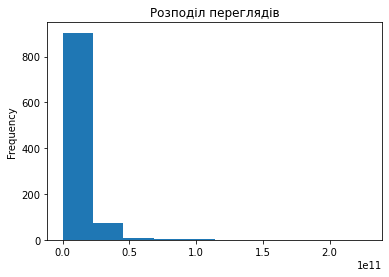

In [44]:
# 8. Побудуйте діаграму розподілу переглядів (використовуйте kind='hist'):
data['video views'].plot(kind='hist', title='Розподіл переглядів')

In [49]:
# 9. Визначте максимальну, мінімальну, середню кількість переглядів (використовуйте методи max, min, mean)
max_views = data["video views"].max()
min_views = data["video views"].min()
mean_views = data["video views"].mean()
print("Максимальна кількість переглядів:", max_views)
print("Мінімальна кількість переглядів:", min_views)
print("Середня кількість переглядів:", mean_views)

Максимальна кількість переглядів: 228000000000.0
Мінімальна кількість переглядів: 0.0
Середня кількість переглядів: 11039537052.03819


In [52]:
# 10. Знайдіть країну, де найбільше відео було завантажено на YouTube
most_videos_country = data["Country"].value_counts().idxmax()
print("Країна з найбільшою кількістю відео:", most_videos_country)

Країна з найбільшою кількістю відео: United States


In [56]:
# 11. Знайдіть відео (виведіть його назву) з найбільшою та найменшою кількістю завантажень uploads.
# Знайти відео з найбільшою кількістю завантажень
video_with_most_views = data.loc[data['uploads'].idxmax()]
most_views_title = video_with_most_views['Title']
# Знайти відео з найменшою кількістю завантажень
video_with_least_views = data.loc[data['uploads'].idxmin()]
least_views_title = video_with_least_views['Title']

print("Відео з найбільшою кількістю завантажень:", most_views_title)
print("Відео з найменшою кількістю завантажень:", least_views_title)

Відео з найбільшою кількістю завантажень: ABP NEWS
Відео з найменшою кількістю завантажень: Music
